<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.4 Logistic Regression**

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

A logistic function can be used to model a binary dependent variable. For example, determining if input data is or is not a member of a specific class.

Given a set of features in input data, we wish to find a function of features that outputs the probability that the label of the input being 1. A label of 1 indicates the input is a member of the class.

Let $p(\alpha;x)$ be the probability that the output is 1. We define:

$log\frac{p(\alpha;x)}{1-p(\alpha;x)} = σ(\alpha^Tx)$

where $\alpha^Tx)$ is analagous to a regression problem for input $\alpha$.

The sigmoid function (right side of above equation) can be reduced to:

$σ(x) = \frac{1}{1+e^{-x}}$

We can create a logistic regression model using the sigmoid function:

In [11]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #initialize weight and bias at 0
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model) #convert to probability thru sigmoid function

            #gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) #for weights (coefficent/slope)
            db = (1 / n_samples) * np.sum(y_predicted - y) #for bias (intercept)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X): #predict y values based on x values
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted] #binary classification (1 if >0.5, else 0)
        return np.array(y_predicted_cls)

Using random sample data, we train and test the model, observing its accuracy:

In [26]:
#generating sample data
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)  #train the model

#predict y values on x values
y_pred = model.predict(X_test)

#evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7


Usually, a regression model will use a scatter plot to visualize its results, however because of the binary nature of the sigmoid function, this is not very useful. Note all values naturally falling at 1 or 0.

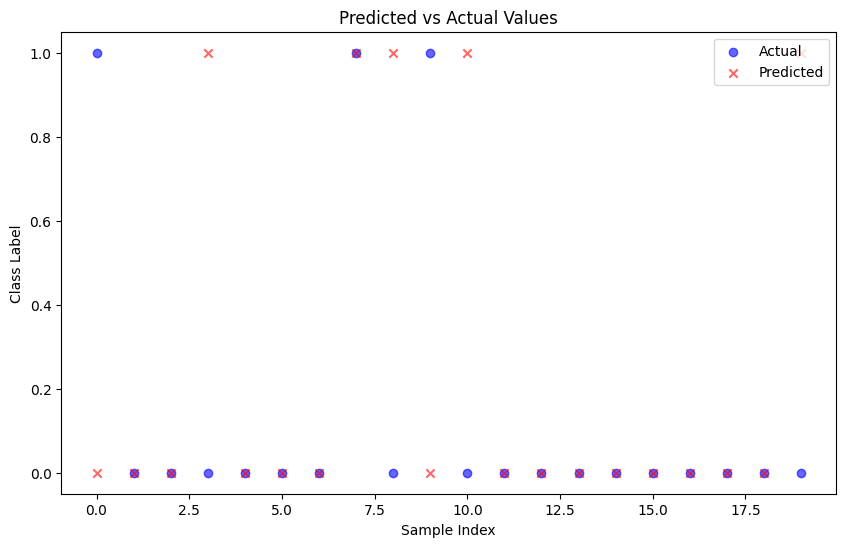

In [27]:
plt.figure(figsize=(10, 6))
index = np.arange(len(y_test))
plt.scatter(index, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(index, y_pred, color='red', label='Predicted', alpha=0.6, marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Predicted vs Actual Values')
plt.legend(loc='upper right')
plt.show()

For this reason, a decision boundary is helpful. It plots a line that separates the data points belonging to different classes, essentially marking the point where the model predicts a 50% probability of belonging to either class. In other words, the decision boundary exhibits the threshold for classification.

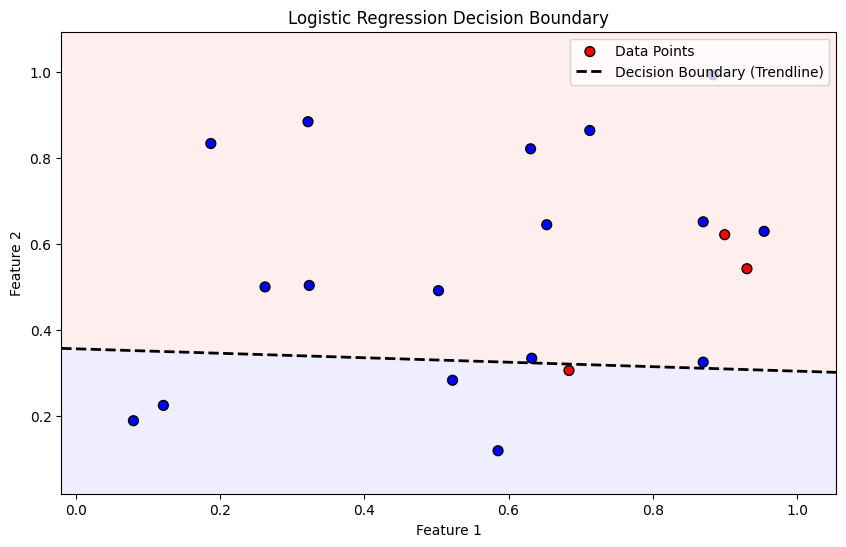

In [29]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.sigmoid(np.dot(grid, model.weights) + model.bias).reshape(xx.shape)

    #contour for decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=["#FFAAAA", "#AAAAFF"])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50, label="Data Points")

    #Adding decision boundary
    slope = -model.weights[0] / model.weights[1]
    intercept = -model.bias / model.weights[1]
    x_vals = np.array([x_min, x_max])
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, color="black", linewidth=2, linestyle='--', label="Decision Boundary (Trendline)")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Logistic Regression Decision Boundary")
    plt.legend(loc="upper right")
    plt.show()

plot_decision_boundary(X_test, y_test, model)